In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

df = pd.read_csv('Google_Stock_Price_Train.csv')
df.head(10)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.45,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.21,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.24,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.76,11688800.0
5,1/10/2012,313.70,315.72,307.30,621.43,8824000.0
6,1/11/2012,310.59,313.52,309.40,624.25,4817800.0
7,1/12/2012,314.43,315.26,312.08,627.92,3764400.0
8,1/13/2012,311.96,312.30,309.37,623.28,4631800.0
9,1/17/2012,314.81,314.81,311.67,626.86,3832800.0


In [19]:
#number of rows and columes of dataset
df.shape

(1258, 6)

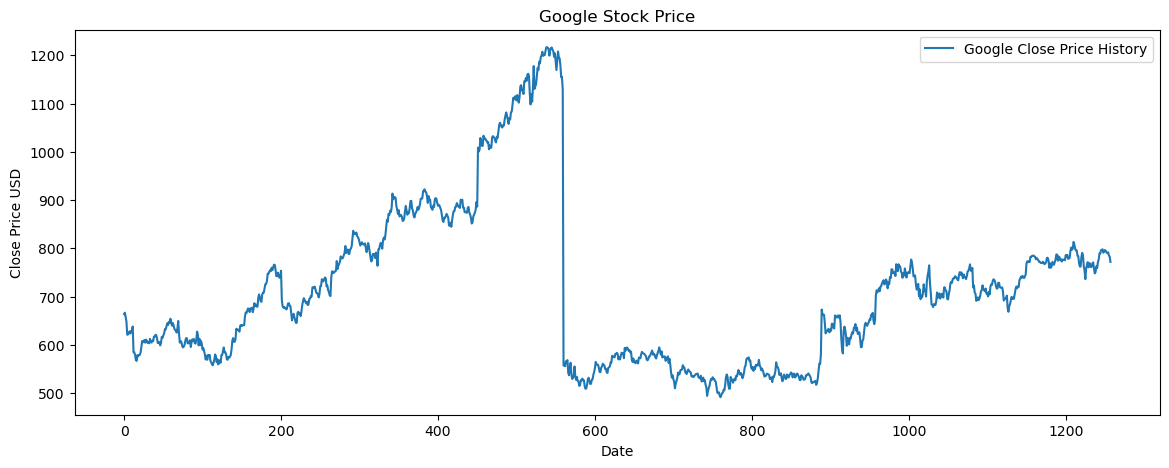

In [5]:
# Visualize the closing price history
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='Google Close Price History')
plt.title('Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

In [20]:
#the type of each feature
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


In [13]:
# Create sequences
def create_sequences(df, sequence_length):
    x = []
    y = []
    for i in range(sequence_length, len(df)):
        x.append(df[i-sequence_length:i, 0])
        y.append(df[i, 0])
    return np.array(x), np.array(y)
sequence_length = 60
x, y = create_sequences(scaled_data, sequence_length)

In [15]:
# Check if sequences were created correctly
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (1198, 60)
y shape: (1198,)


In [14]:
# Split the data
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [16]:
# Reshape for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\abass\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0498
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0067
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0059
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0085
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0046
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0064
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0043
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0059
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0030
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0048
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0061
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0029
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0058
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032
Epoc

In [21]:
# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [23]:
# Plot the results
train = df[:train_size + sequence_length]
valid = df[train_size + sequence_length:]
valid['Predictions'] = predictions

C:\Users\abass\AppData\Local\Temp\ipykernel_18064\4039675109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


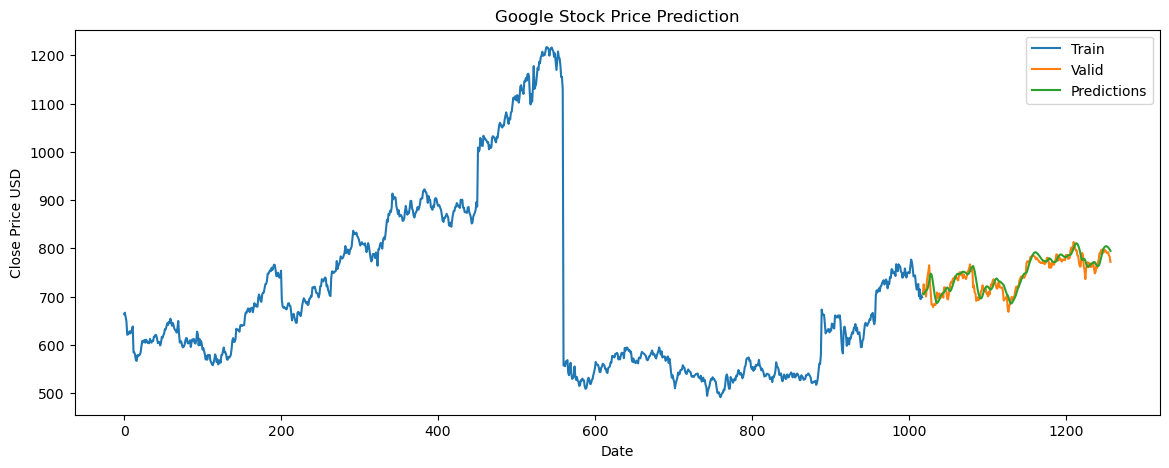

In [24]:
# Visualize the closing price history
plt.figure(figsize=(14, 5))
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Valid')
plt.plot(valid['Predictions'], label='Predictions')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()

In [25]:
# Evaluate the model
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 749.5226606512299
